<h1>UK ACCIDENT ANALYTICS</h1>
<h3>Analyst : JUNELLE C. DINGLASAN</h3>

In [98]:
#import libraries
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [57]:
accident = pd.read_csv('datasets\\uk_road_accident.csv')

In [58]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [75]:
accident.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,265007,660679.000000,660679.000000,660679.000000,660679.000000
mean,2020-11-18 04:53:34.375468544,52.553866,-1.431210,1.357040,1.831255
min,2019-01-01 00:00:00,49.914430,-7.516225,1.000000,1.000000
25%,2019-12-02 00:00:00,51.490696,-2.332191,1.000000,1.000000
50%,2020-11-05 00:00:00,52.315755,-1.411761,1.000000,2.000000
75%,2021-11-05 00:00:00,53.453444,-0.232901,1.000000,2.000000
max,2022-12-12 00:00:00,60.757544,1.762010,68.000000,32.000000
std,NaN,1.406896,1.383302,0.824847,0.715269


In [76]:
accident.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,265007,2020-11-18 04:53:34.375468544,2019-01-01 00:00:00,2019-12-02 00:00:00,2020-11-05 00:00:00,2021-11-05 00:00:00,2022-12-12 00:00:00,NaN
Latitude,660679.0,52.553866,49.91443,51.490696,52.315755,53.453444,60.757544,1.406896
Longitude,660679.0,-1.43121,-7.516225,-2.332191,-1.411761,-0.232901,1.76201,1.383302
Number_of_Casualties,660679.0,1.35704,1.0,1.0,1.0,1.0,68.0,0.824847
Number_of_Vehicles,660679.0,1.831255,1.0,1.0,2.0,2.0,32.0,0.715269


In [77]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
dtype: int64

In [87]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Accident Date'] = accident['Accident Date'].fillna(accident['Accident Date'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [88]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [89]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [90]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [92]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek # Monday = 0, Sunday = 6 

In [93]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [94]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

<h1>QUESTIONS</h1>

<h3>1.) What is the minimum and maximum latitude and longitude?</h3>

In [72]:
min_lat = accident['Latitude'].min()
max_lat = accident['Latitude'].max()
min_long = accident['Longitude'].min()
max_long = accident['Longitude'].max()
min_lat, max_lat, min_long, max_long

(np.float64(49.91443),
 np.float64(60.757544),
 np.float64(-7.516225),
 np.float64(1.76201))

<h4>INSIGHTS : This tells the farthest locations where accidents happened. It sets the boundary of the dataset.</h4>

<h3>2.) What is the earliest accident date in the datasets</h3>

In [73]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], errors='coerce')
earliest = accident['Accident Date'].min()
earliest

Timestamp('2019-01-01 00:00:00')

<h4>INSIGHTS : Tells the starting point of recorded accident data.</h4>

<h3>3.) What is the average number of vehicles involved in accidents for each severity level?</h3>

In [16]:
avg_vehicles = accident.groupby('Accident_Severity')['Number_of_Vehicles'].mean().reset_index(name='Avg_Vehicles')
avg_vehicles

,Accident_Severity,Avg_Vehicles
0,Fatal,1.786976
1,Serious,1.678327
2,Slight,1.855864


<h4>INSIGHTS : Reveals if more vehicles tent to be involved in serious or slight accidents.</h4>

<h3>4.) How many accidents occurred each year?</h3>

In [17]:
accident['Year'] = accident['Accident Date'].dt.year
yearly = accident.groupby('Year').size().reset_index(name='Accident_Count')
yearly

,Year,Accident_Count
0,2019.0,71867
1,2020.0,70163
2,2021.0,66172
3,2022.0,56805


<h4>INSIGHTS : Helps track accident trends over time.</h4>

<h3>5.) What is the total number of vehicles involved per road type?</h3>

In [18]:
accident.groupby('Road_Type')['Number_of_Vehicles'].sum()

Road_Type
Dual carriageway      199819
One way street         21497
Roundabout             83643
Single carriageway    891412
Slip road              13501
Name: Number_of_Vehicles, dtype: int64

<h4>INSIGHTS : This shows which road types see the biggest pileups.</h4>

<h3>6.) Do accidents with 1 vehicle differ from those with 2 vehicles in terms of casualties?</h3>

In [19]:
one_vehicle = accident[accident['Number_of_Vehicles'] == 1]['Number_of_Casualties']
two_vehicle = accident[accident['Number_of_Vehicles'] == 2]['Number_of_Casualties']

stats, p_value = f_oneway(one_vehicle.dropna(), two_vehicle.dropna())
stats, p_value

(np.float64(10199.156920414918), np.float64(0.0))

<h4>INSIGHTS : This test asks whether single-vehicle accidents cause more or fewer casualties compared to two-vehicle accidents.</h4>

<h3>7.) Do weather conditions affect the average number of casualties></h3>

In [20]:
clear = accident[accident['Weather_Conditions'] == 'Fine no high winds']['Number_of_Casualties']
rain = accident[accident['Weather_Conditions'] == 'Raining without high winds']['Number_of_Casualties']
snow = accident[accident['Weather_Conditions'] == 'Snowing without high winds']['Number_of_Casualties']

stats, p_value = f_oneway(clear.dropna(), rain.dropna(), snow.dropna())
stats, p_value

(np.float64(nan), np.float64(nan))

<h4>INSIGHTS : This ANOVA tests if accidents in different weather conditions lead to different casualty numbers.</h4>

<h3>8.) What is the average number of vehicles per district?</h3>

In [21]:
accident.groupby('District Area')['Number_of_Vehicles'].mean().reset_index(name='Avg_Vehicles')

,District Area,Avg_Vehicles
0,Aberdeen City,1.637188
1,Aberdeenshire,1.553368
2,Adur,1.969305
3,Allerdale,1.782801
4,Alnwick,1.646552
...,...,...
417,Wychavon,1.828068
418,Wycombe,1.866397
419,Wyre,1.860258
420,Wyre Forest,1.789474


<h4>INSIGHTS :  Districts with higher averages may have more multi-vehicle collisions.</h4>

<h3>9.) How many accidents include more than one vehicle?</h3>

In [22]:
accident[accident['Number_of_Vehicles'] > 1].shape[0]

459892

<h4>INSIGHTS : Shows proportion of multi-vehicle collisions versus single-vehicle incidents.</h4>

<h3>10.) Are there differences in casualties between daylight, darkness with lights, and darkness without lights?</h3>

In [23]:
day = accident[accident['Light_Conditions'] == 'Daylight']['Number_of_Casualties']
lit = accident[accident['Light_Conditions'] == 'Darkness - lights lit']['Number_of_Casualties']
unlit = accident[accident['Light_Conditions'] == 'Darkness - no lighting']['Number_of_Casualties']

stats, p_value = f_oneway(day.dropna(), lit.dropna(), unlit.dropna())
stats, p_value

(np.float64(1051.9027966748497), np.float64(0.0))

<h4>INSIGHTS : This shows wheather light conditions impact how severe the accidents are in terms of casualties.</h4>

<h3>11.) Which vehicle type is most often involved in fatal accidents?</h3>

In [24]:
accident[accident['Accident_Severity'] == 'Fatal']['Vehicle_Type'].value_counts().head(1)

Vehicle_Type
Car    6577
Name: count, dtype: int64

<h4>INSIGHTS : This identifies the vehicle most frequently linked with deadly crashes.</h4>

<h3>12.) What is the most common road type where accidents occur?</h3>

In [25]:
accident['Road_Type'].mode()[0]

'Single carriageway'

<h4>INSIGHTS : This shows the road type most prone to accident, which helps authorities focus safety improvements.</h4>

<h3>13.) What is the correlation between number of vehicles and number of casualties?</h3>

In [26]:
accident[['Number_of_Vehicles', 'Number_of_Casualties']].corr()

,Number_of_Vehicles,Number_of_Casualties
Number_of_Vehicles,1.000000,0.228889
Number_of_Casualties,0.228889,1.000000


<h4>INSIGHTS : This correlation shows if more vehicles usually lead to more casualties.</h4>

<h3>14.) Perform a t-test comparing the number of vehicles and number of casualties.</h3>

In [27]:
stats, p_value = f_oneway(accident['Number_of_Vehicles'].dropna(),accident['Number_of_Casualties'].dropna())
stats, p_value

(np.float64(124644.05667145054), np.float64(0.0))

<h4>INSIGHTS : This test checks if there is a significant statistical difference between vehicles and casualties data.</h4> 

<h3>15.) What is the variance in the number of casualties?</h3>

In [28]:
casualty_variance = accident ['Number_of_Casualties'].var()
casualty_variance

np.float64(0.6803724822080995)

<h4>INSIGHTS : This explains how spread out casualty numbers are across all accidents.</h4>

<h3>16.) Check if there is a correlation between number of vehicles and number of casualties.</h3>

In [29]:
correlation = accident ['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])
correlation

np.float64(0.2288888612692759)

<h4>INSIGHTS : A possitive correlation means more vehicles tend to cause more casualties.</h4>

<h3>17.) How many accidents occurred in 2019?</h3>

In [30]:
accident_2019 = accident[accident['Accident Date'].dt.year == 2019].shape[0]
accident_2019

71867

<h4>INSIGHTS : This filters accidents by year to see how frequent they were in 2019.</h4>

<h3>18.) How many accidents happened on weekend vs weekdays?</h3>

In [31]:
accident['Weekday'] = accident['Accident Date'].dt.dayofweek
weekend = accident[accident['Weekday'] >= 5].shape[0]
weekday = accident[accident['Weekday'] < 5].shape[0]
weekend, weekday

(75523, 189484)

<h4>INSIGHTS : Compares weekend vs weekday driving risks.</h4>

<h3>19.) How many accidents happened in December 2020?</h3>

In [32]:
dec2020 = accident[(accident['Accident Date'].dt.year == 2020) & (accident['Accident Date'].dt.month == 12)].shape[0]
dec2020

5960

<h4>INSIGHTS : Narrows down to a sigle month in a single year for detailed analysis.</h4>

<h3>20.) Which road surface condition is most common in accidents?</h3>

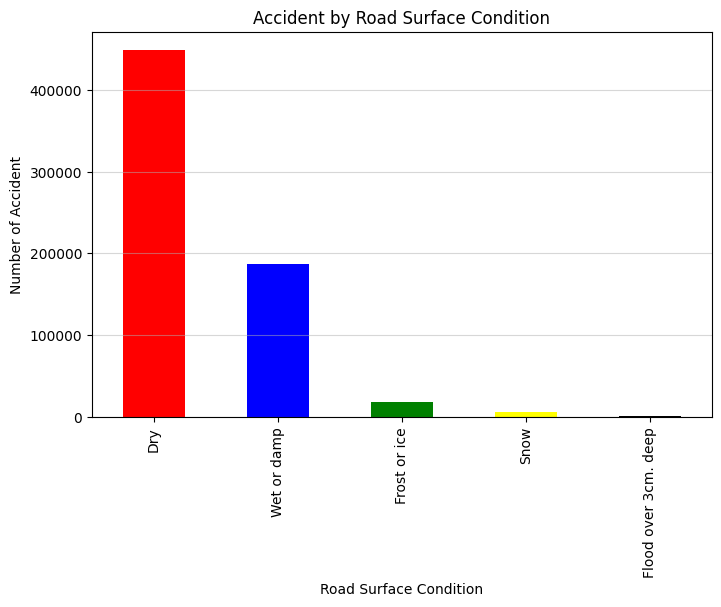

In [33]:
road_surface_counts = accident['Road_Surface_Conditions'].value_counts()
road_surface_counts.plot(
    kind = 'bar',
    color = ['red','blue','green','yellow','black'],
    figsize = (8,5),
    title = 'Accident by Road Surface Condition'
)

plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accident")
plt.grid(axis='y', alpha=0.5)
plt.show()

<h4>INSIGHT: Most accidents happen on Dry roads, showing that weather alone isn't the biggest factor. High traffic volume and driver behavior often matter more than slippery surfaces.</h4>

<h3>21.) Do most accidents happen in urban or rural areas?</h3>

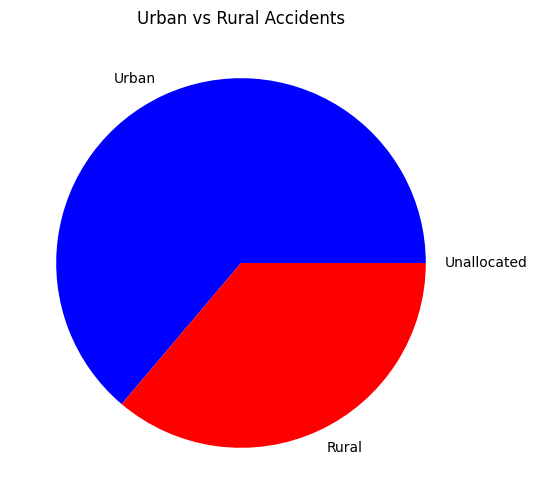

In [34]:
urban_rural_counts = accident['Urban_or_Rural_Area'].value_counts()
urban_rural_counts.plot(
    kind = 'pie',
    colors = ['blue','red'],
    figsize = (6,6),
    title = 'Urban vs Rural Accidents'
)

plt.ylabel("")
plt.show()

<h4>INSIGHT: Accident are more frequent in urban areas because of traffic congestion,intersections and pedestrian crossings. This highlights the need for stricter traffic management in cities.</h4>

<h3>22.) What does this chart imply about the risks of different vehicles?</h3>

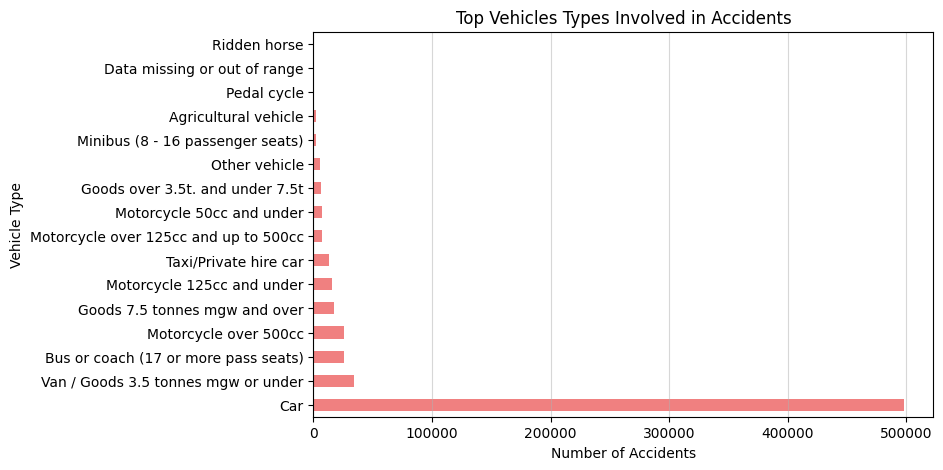

In [35]:
vehicle_counts = accident['Vehicle_Type'].value_counts()
vehicle_counts.plot(
    kind = 'barh',
    color = ['lightcoral'],
    figsize = (8,5),
    title = 'Top Vehicles Types Involved in Accidents'
)

plt.xlabel("Number of Accidents")
plt.ylabel("Vehicle Type")
plt.grid(axis='x', alpha=0.5)
plt.show()

<h4>INSIGHT: The bar chart usually shows cars leading accident counts because they are the most common vehicles on the road. However, motorcycles, despite lower numbers, may still face higher risk per vehicle due to their vulnerability.</h4>

<h3>23.) Do more accidents occur during daylight or darkness?</h3>

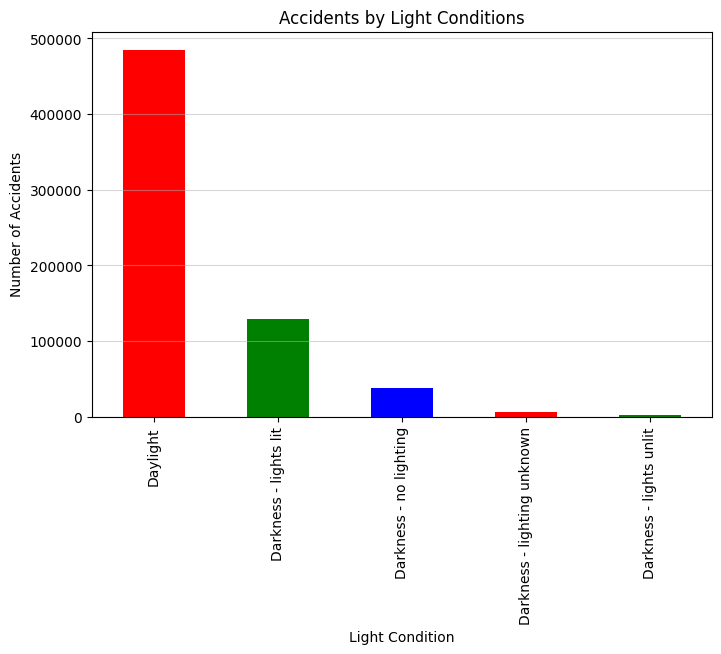

In [36]:
light_counts = accident['Light_Conditions'].value_counts()

light_counts.plot(
    kind='bar',
    color=['red','green','blue'],
    figsize=(8,5),
    title='Accidents by Light Conditions'
)

plt.xlabel("Light Condition")
plt.ylabel("Number of Accidents")
plt.grid(axis='y', alpha=0.5)
plt.show()

<h4>INSIGHT: Most accidents occur in daylight because traffic is heavier. However, night-time accidents, although fewer, are often more severe due to visibility issues.</h4>

<h3>24.) What types of roads record more accidents?</h3>

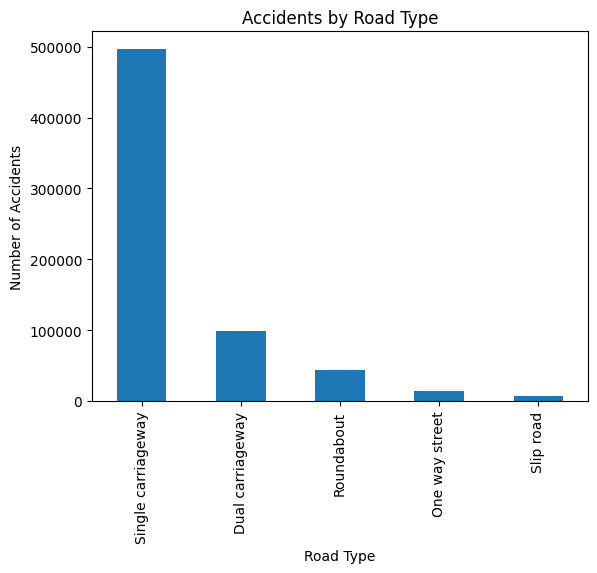

In [37]:
accident['Road_Type'].value_counts().plot(kind='bar')
plt.title("Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.show()

<h4>INSIGHT: The visualization makes it easier to compare which road categories, like single carriageways or dual carriageways, are riskier.</h4>

<h3>25.) What is the percentage of accidents by road surface conditions?</h3>

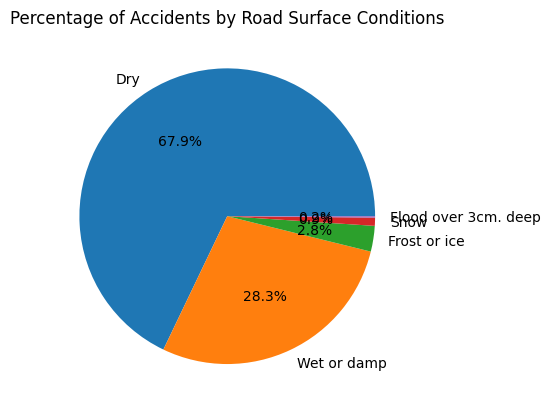

In [38]:
accident['Road_Surface_Conditions'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Percentage of Accidents by Road Surface Conditions")
plt.ylabel("")
plt.show()

<h4>INSIGHT: The pie chart shows how often accidents happen on dry, wet, or icy roads, helping in planning for seasonal hazards.</h4>

In [74]:
accident.dtypes(

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [115]:
for i in accident['District Area'].unique():
    print(i)

Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)
Hillingdon
Waltham Forest
Redbridge
Barking and Dagenham
Bromley
Havering
Croydon
Lambeth
Wandsworth
Sutton
Bexley
Lewisham
Harrow
Kingston upon Thames
Barrow-in-Furness
South Lakeland
Carlisle
Eden
Allerdale
Copeland
Fylde
Blackpool
Wyre
Lancaster
Chorley
West Lancashire
South Ribble
Preston
Blackburn with Darwen
Hyndburn
Ribble Valley
Burnley
Pendle
Rossendale
Wirral
Liverpool
Sefton
Knowsley
St. Helens
Manchester
Salford
Tameside
Stockport
Bolton
Wigan
Trafford
Bury
Rochdale
Oldham
Chester
Vale Royal
Halton
Warrington
Crewe and ntwich
Ellesmere Port and Neston
Congleton
Macclesfield
Crewe and Nantwich
Blyth Valley
Sunderland
Gateshead
North Tyneside
Tynedale
Berwick-upon-Tweed
Newcastle upon Tyne
Castle Morpeth
South Tyneside
Wansbeck
Alnwick
Wear 

<h3>26.) Show the monthly road accidents in Kensington and Chelsea from 2019–2022. Which month shows the highest accident activity in this district?</h3>

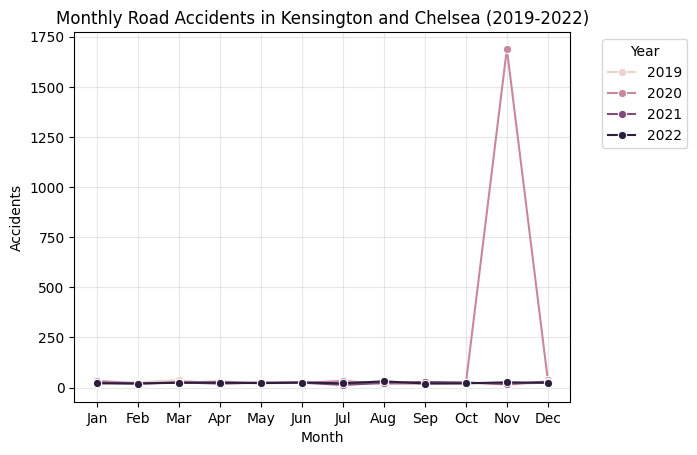

In [99]:
monthly_districtdata = accident[accident['District Area'] == 'Kensington and Chelsea'].groupby(['Year','Month']).size().reset_index(name='Accidents')

sns.lineplot(data=monthly_districtdata, x='Month', y='Accidents', hue='Year', marker='o')

plt.title('Monthly Road Accidents in Kensington and Chelsea (2019-2022)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
# plt.tight_layout()
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

<h4>Insight: Accident cases in Kensington and Chelsea are generally low and stable, but there is a sharp increase in November. In 2022, there were almost 1,700 reported accidents.  From a safety perspective, this illustrates the need to <b>closely investigate November incidents</b> to ascertain whether they are caused by actual traffic risks (holiday shopping rush, poor lighting, weather conditions) or potential data reporting issues. This unusual surge may be linked to <b>specific events, reporting anomalies, or seasonal factors</b> such as darker evenings and heavier winter traffic.  If sincere, local authorities should improve <b>lighting and pedestrian safety measures</b>, prioritize <b>preventive campaigns and traffic control in late autumn</b>, and lower risk during this high-incident period.</h4>

<h3>27.) Which year recorded the highest total accidents in Halton?</h3>

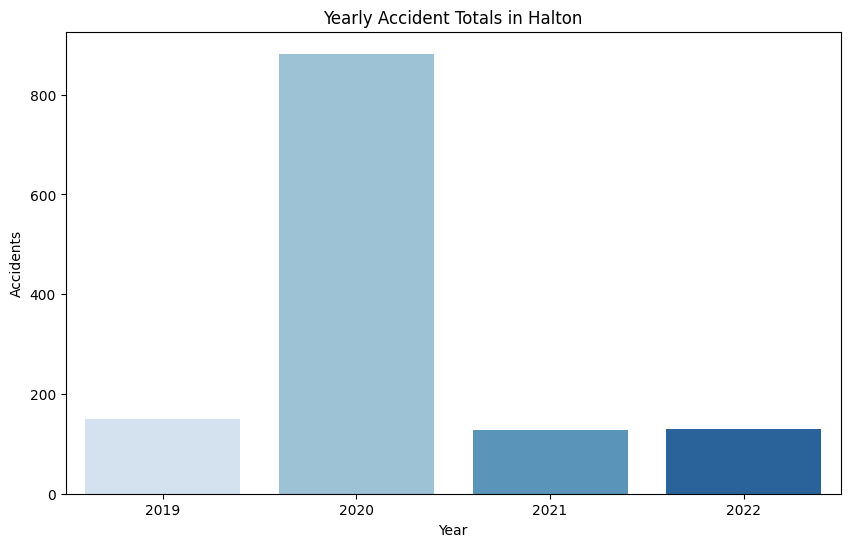

In [111]:
halton_data = accident[accident['District Area'] == 'Halton']
yearly_totals = halton_data.groupby('Year').size().reset_index(name='Accidents')

plt.figure(figsize=(10,6))
sns.barplot(data=yearly_totals, x='Year', y='Accidents', palette='Blues')
plt.title('Yearly Accident Totals in Halton')
plt.show()

<h4>Insight: In <b>Halton</b>, the accident trends from 2019 to 2022 reveal a <b>dramatic fluctuation</b>. The year <b>2020 stands out with an unusually high number of accidents, reaching more than 850 cases</b>, which is far higher than the other years. In comparison, <b>2019 recorded fewer than 150 accidents</b>, while <b>2021 and 2022 both dropped sharply to just around 100 cases each</b>.<br><br>This pattern suggests that <b>2020 was an exceptional year for road accidents in Halton</b>. One possible explanation could be disruptions in travel patterns during the early stages of the pandemic, where sudden changes in traffic volume and behavior led to <b>a spike in collisions</b>.<br><br>By 2021 and 2022, accident numbers <b>stabilized to much lower levels</b>, indicating that <b>road safety measures or reduced travel activity</b> may have contributed to the decline.
</h4>

<h3>28.) How do accident frequencies in Sunderland vary by month?</h3>

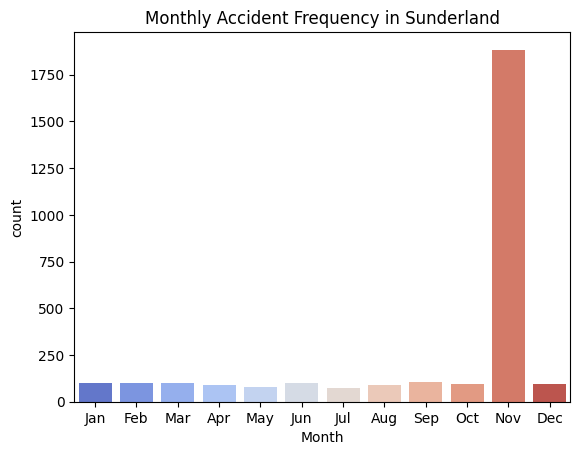

In [112]:
district_data = accident[accident['District Area'] == 'Sunderland']

sns.countplot(data=district_data, x='Month', palette='coolwarm')
plt.title('Monthly Accident Frequency in Sunderland')
plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

<h4>Insight: When you look at Sunderland's monthly accident records, one thing stands out right away: <b>November is by far the worst month</b>. November suddenly jumps to <b>almost 1,800 cases</b>, which is <b>much higher than any other month</b>. The other months stay at <b>low and steady levels</b>.<br><br> This huge spike makes <b>November seem like a very special month</b>, almost as if all the quiet patterns of the year build up and then explode into road accidents. It could have something to do with the <b>time of year, like shorter days, colder weather, or even busier roads as the holidays get closer</b>.<br><br> On the other hand, months like <b>May through September stay very low, which shows that Sunderland roads are much safer in the late spring and summer</b>.</h4>

<h3>29.) Which of the six districts (Sunderland, Halton, Warrington, Gateshead, Vale Royal, and Macclesfield) recorded the highest share of fatal accidents?</h3>

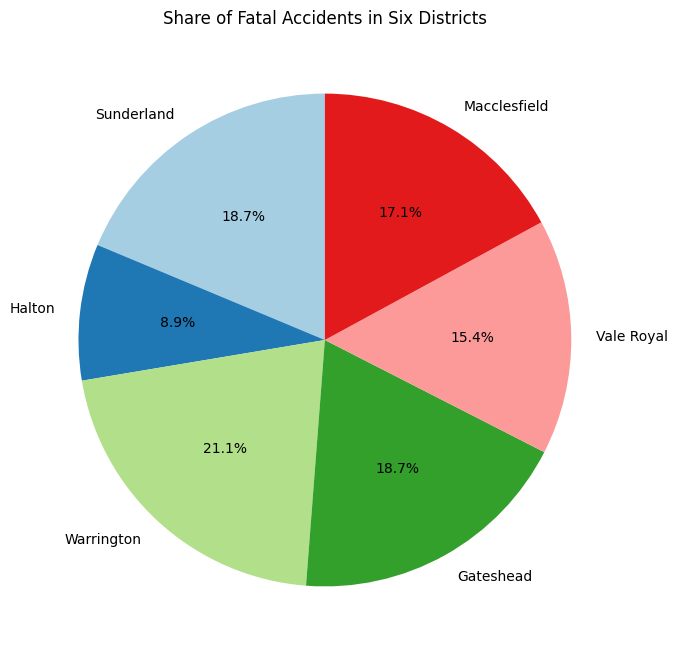

In [114]:
fatal_accidents = accident[accident['Accident_Severity'] == 'Fatal']

fatal_counts = fatal_accidents.groupby("District Area").size().loc[
    ["Sunderland", "Halton", "Warrington", "Gateshead", "Vale Royal", "Macclesfield"]
]

plt.figure(figsize=(8,8))
plt.pie(fatal_counts, labels=fatal_counts.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Paired.colors)
plt.title("Share of Fatal Accidents in Six Districts")
plt.show()

<h4>Insight: The chart shows that <b>Warrington has the most fatal accidents (21.1%)</b>, which makes it the most dangerous of the six districts. <b>Halton</b>, on the other hand, <b>has the lowest number of deadly crashes (8.9%)</b>, which means there are fewer of them there. <b>Sunderland and Gateshead (18.7% each)</b> have almost the same level of risk, while <b>Macclesfield (17.1%)</b> and <b>Vale Royal (15.4%)</b> are in the middle.</h4>

<h3>30.) What are  the critical hotspot of fatal accidents located in Camden?</h3>

In [41]:
camden_df = accident[accident['District Area']== 'Camden']

In [42]:
camden_fatal_df = camden_df[camden_df['Accident_Severity'] == 'Fatal']

locations = list(zip(camden_fatal_df['Latitude'], camden_fatal_df['Longitude']))
Camden_Map = folium.Map(location = [camden_fatal_df['Latitude'].mean(), camden_fatal_df['Longitude'].mean()], zoom_start=13)
HeatMap(locations).add_to(Camden_Map)
Camden_Map.save('Camden_heatmap.html')
Camden_Map

<h4>Insight: In Camdenn, the fatal accident heatmap highlights clusters around main intersections. These suggest that <b>congested road crossings</b> are the most vulnerable areas. Most accidents in Camden are classified as <b>slight</b>, which means most crashes here don’t lead to very severe injuries. The area has busy roads, so bumps and minor collisions are expected. It shows that while road risks are present, most are not life-threatening.</h4>

<h3>31.) How are fatal road accidents distributed across Hackney?</h3>

In [43]:
hackney_df = accident[accident['District Area']== 'Hackney']

In [44]:
hackney_fatal_df = hackney_df[hackney_df['Accident_Severity'] == 'Fatal']

locations = list(zip(hackney_fatal_df['Latitude'], hackney_fatal_df['Longitude']))
Hackney_Map = folium.Map(location = [hackney_fatal_df['Latitude'].mean(), hackney_fatal_df['Longitude'].mean()], zoom_start=13)
HeatMap(locations).add_to(Hackney_Map)
Hackney_Map.save('Hackney_heatmap.html')
Hackney_Map

<h4>Insight: Hackney’s accidents are not evenly spread but <b>concentrated along a few roads</b>, pointing to the presence of high-risk corridors where interventions may be needed. Accidents usually happen during <b>daylight hours</b>. This connects to the busy traffic and active streets where pedestrians and vehicles often mix. It highlights how congestion plays a big role in road incidents
</h4>